In [57]:
import pandas as pd
import numpy as np
import pystan
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data = pd.read_csv('airline_passengers.csv', parse_dates=['Month'])
# there is one entry at 144 row which is not data thats why parse_dates will not work, 
# we need to change later after remving 144 row.

In [59]:
data.columns = ['ds', 'y']

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      145 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [61]:
data.drop(144,axis=0,inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

In [62]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [63]:
from fbprophet import Prophet

In [64]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [65]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [67]:
future_data = model.make_future_dataframe(periods=365)

In [68]:
future_data.head()
future_data.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [69]:
prediction = model.predict(future_data)

In [70]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,56.484084,114.182324,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,48.648289,107.447567,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,81.502582,139.397020,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,80.574570,134.636390,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,83.412904,137.724589,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


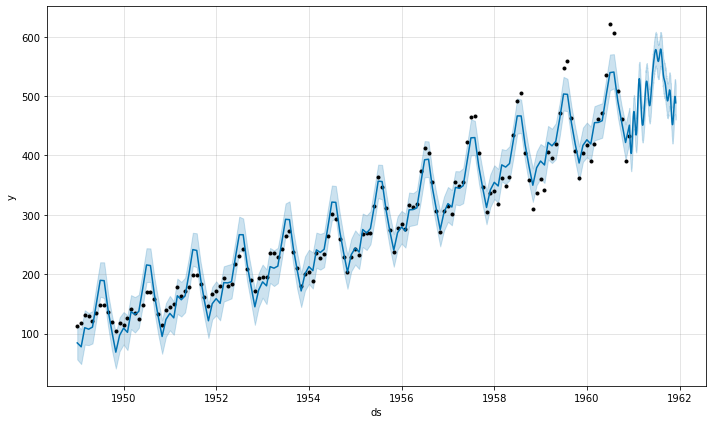

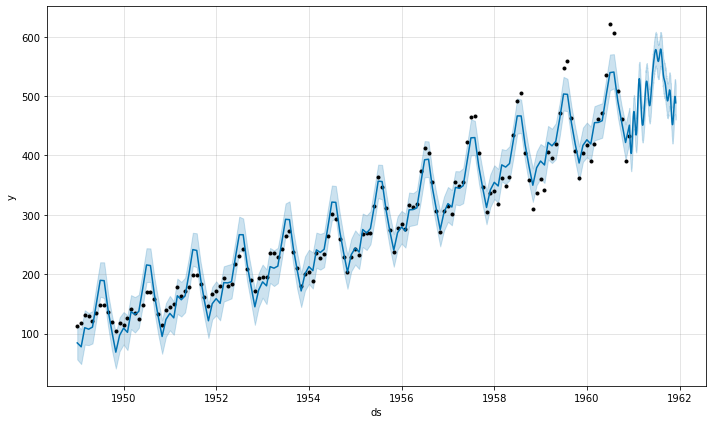

In [71]:
model.plot(prediction)

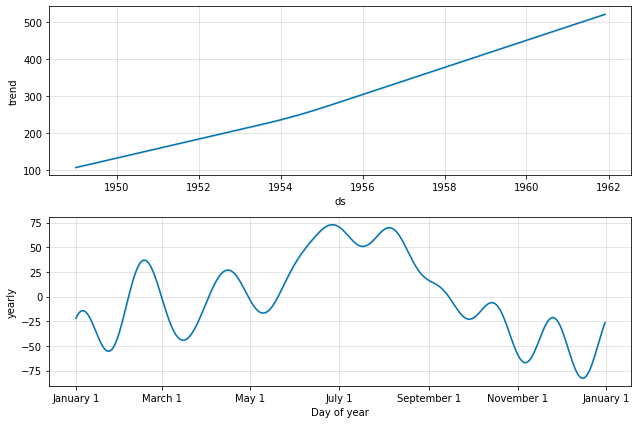

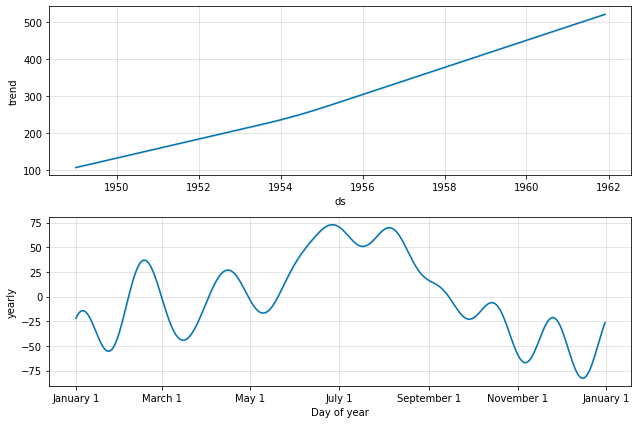

In [72]:
model.plot_components(prediction)

In [89]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1095 days', horizon='730 days', period='180 days', parallel='processes')

INFO:fbprophet:Making 15 forecasts with cutoffs between 1952-01-08 00:00:00 and 1958-12-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001ED41E5C760>


In [90]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-02-01,176.418553,173.038713,179.686598,180.0,1952-01-08
1,1952-03-01,190.922738,187.514795,194.070118,193.0,1952-01-08
2,1952-04-01,199.998322,196.534540,203.526627,181.0,1952-01-08
3,1952-05-01,183.896476,180.606615,187.192019,183.0,1952-01-08
4,1952-06-01,208.184849,204.651868,211.724204,218.0,1952-01-08


In [91]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(df_cv)
df_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,78 days,1053.456083,32.456988,26.120283,0.080566,0.088366,0.222222
1,79 days,1039.367503,32.239223,25.640874,0.077864,0.085577,0.250000
2,83 days,1013.994442,31.843279,25.199643,0.075919,0.082889,0.250000
3,84 days,976.039055,31.241624,25.126354,0.077040,0.085577,0.222222
4,87 days,976.035586,31.241568,25.119844,0.077024,0.085577,0.222222


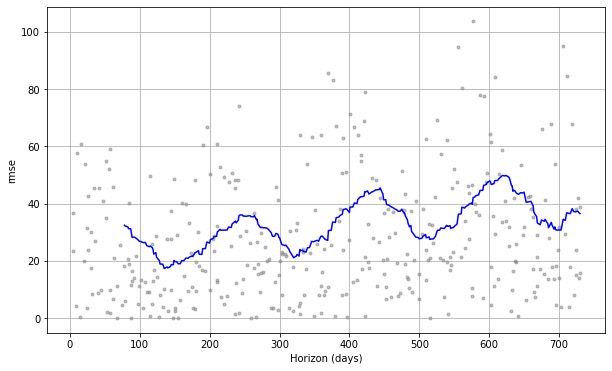

In [92]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')